In [35]:
import gym
import tensorflow as tf
from tensorflow import keras
import random
import numpy as np
import datetime as dt
import matplotlib.pyplot as plt

In [36]:
model = keras.Sequential( [keras.layers.Dense(units=1, input_shape=[1])])
model.compile( optimizer = 'sgd', loss = 'mean_squared_error')

name

In [37]:
xs = np.array([-1.0, 0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0], dtype=float)
ys = np.array([ -3.0, -1.0, 1.0, 3.0, 5.0, 7.0, 9.0, 11.0, 13.0, 15.0, 17.0, 19.0], dtype=float)

In [38]:
model.fit( xs, ys, epochs = 500)

Epoch 1/500
1/1 [==============================] - 1s 581ms/step - loss: 6.1931
Epoch 2/500
1/1 [==============================] - 0s 2ms/step - loss: 1.0928
Epoch 3/500
1/1 [==============================] - 0s 3ms/step - loss: 0.4843
Epoch 4/500
1/1 [==============================] - 0s 3ms/step - loss: 0.4072
Epoch 5/500
1/1 [==============================] - 0s 2ms/step - loss: 0.3930
Epoch 6/500
1/1 [==============================] - 0s 3ms/step - loss: 0.3863
Epoch 7/500
1/1 [==============================] - 0s 3ms/step - loss: 0.3806
Epoch 8/500
1/1 [==============================] - 0s 2ms/step - loss: 0.3751
Epoch 9/500
1/1 [==============================] - 0s 2ms/step - loss: 0.3697
Epoch 10/500
1/1 [==============================] - 0s 3ms/step - loss: 0.3643
Epoch 11/500
1/1 [==============================] - 0s 2ms/step - loss: 0.3590
Epoch 12/500
1/1 [==============================] - 0s 2ms/step - loss: 0.3538
Epoch 13/500
1/1 [==============================] - 0s 3ms/

In [39]:
fashion_mnist = keras.datasets.fashion_mnist
(train_images, train_labels),(test_images, test_labels) = fashion_mnist.load_data()
train_images = train_images / 255.0
test_images = test_images / 255.0

In [40]:
class myCallback( tf.keras.callbacks.Callback):
    def on_epoch_end( self, epoch, logs={}):
        if( logs.get('loss') < 0.1 ):
            print( "\nLoss is low so cancelling the training!")
            self.model.stop_training = True

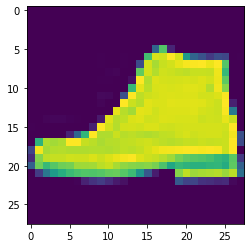

In [41]:
plt.imshow( train_images[42])

In [52]:
model = keras.Sequential( [
    keras.layers.Conv2D(64, (3,3), activation = 'relu', input_shape= (28,28,1)),
    keras.layers.MaxPooling2D(2,2),
    keras.layers.Conv2D(64, (3,3), activation = 'relu' ),
    keras.layers.MaxPooling2D(2,2),
    keras.layers.Flatten(),
    keras.layers.Dense( 128, activation=tf.nn.relu),
    keras.layers.Dense( 10, activation=tf.nn.softmax)
])

In [53]:
callbacks = myCallback()
model.compile( optimizer = tf.optimizers.Adam(),
             loss = 'sparse_categorical_crossentropy')
model.fit(train_images, train_labels, epochs = 50, callbacks = [callbacks] )

Epoch 1/50


ValueError: in user code:

    E:\Program Files\anaconda\lib\site-packages\tensorflow\python\keras\engine\training.py:805 train_function  *
        return step_function(self, iterator)
    E:\Program Files\anaconda\lib\site-packages\tensorflow\python\keras\engine\training.py:795 step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    E:\Program Files\anaconda\lib\site-packages\tensorflow\python\distribute\distribute_lib.py:1259 run
        return self._extended.call_for_each_replica(fn, args=args, kwargs=kwargs)
    E:\Program Files\anaconda\lib\site-packages\tensorflow\python\distribute\distribute_lib.py:2730 call_for_each_replica
        return self._call_for_each_replica(fn, args, kwargs)
    E:\Program Files\anaconda\lib\site-packages\tensorflow\python\distribute\distribute_lib.py:3417 _call_for_each_replica
        return fn(*args, **kwargs)
    E:\Program Files\anaconda\lib\site-packages\tensorflow\python\keras\engine\training.py:788 run_step  **
        outputs = model.train_step(data)
    E:\Program Files\anaconda\lib\site-packages\tensorflow\python\keras\engine\training.py:754 train_step
        y_pred = self(x, training=True)
    E:\Program Files\anaconda\lib\site-packages\tensorflow\python\keras\engine\base_layer.py:998 __call__
        input_spec.assert_input_compatibility(self.input_spec, inputs, self.name)
    E:\Program Files\anaconda\lib\site-packages\tensorflow\python\keras\engine\input_spec.py:239 assert_input_compatibility
        str(tuple(shape)))

    ValueError: Input 0 of layer sequential_11 is incompatible with the layer: : expected min_ndim=4, found ndim=3. Full shape received: (32, 28, 28)
